<a href="https://colab.research.google.com/github/vbhaktha13/buy_prediction/blob/main/Buy_prediction_Vish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Using Machine Learning to Predict whether Customers’ will make a buy in Next 3 Months**

**Problem Statement**


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, **your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.**



About Dataset


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.



Data Dictionary


You are provided with 3 files - train.csv, test.csv and sample_submission.csv



Training set


train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 


Variable                                Description

- id                                - Unique identifier of a lead      



- created_at  Date of lead dropped   - signup_date/Sign up date of the user on the website

- campaign_var (1 and 2)           -  Campaign information of the lead

- products_purchased           -  No. of past products purchased at the time of dropping the lead

- user_activity_var (1 to 12)   - Derived activities of the user on the website



Target variable is buy

0 or 1 indicating if the user will buy the product in next 3 months or not 



In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas_profiling
import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

In [2]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
#from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time 



In [3]:
df_train=pd.read_csv("/content/train_wn75k28.csv")
df_test=pd.read_csv("/content/test_Wf7sxXF.csv")

In [4]:
df_train.set_index('id',inplace=True)
df_test.set_index('id',inplace=True)

In [5]:
df_train.shape

(39161, 18)

In [6]:
df_train.head(2)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0


In [7]:
df_test.shape

(13184, 17)

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(df_train)

,Total,Percent
products_purchased,20911,53.397513
signup_date,15113,38.591966
created_at,0,0.000000
user_activity_var_6,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000


In [10]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,39161,365,2021-12-26,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_var_1,39161.0,NaN,NaN,NaN,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,NaN,NaN,NaN,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,NaN,NaN,NaN,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
signup_date,24048,1800,2021-07-18,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_activity_var_1,39161.0,NaN,NaN,NaN,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,NaN,NaN,NaN,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,NaN,NaN,NaN,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,NaN,NaN,NaN,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,NaN,NaN,NaN,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0


**observation**
- Products Purchased
- sign_up date both have null values

In [11]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,13184,89,2022-01-23,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_var_1,13184.0,NaN,NaN,NaN,7.724439,3.599981,1.0,5.0,8.0,10.0,16.0
campaign_var_2,13184.0,NaN,NaN,NaN,7.943416,2.687832,1.0,6.0,8.0,10.0,15.0
products_purchased,5048.0,NaN,NaN,NaN,2.108954,0.783483,1.0,2.0,2.0,3.0,4.0
signup_date,6535,1257,2022-03-06,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_activity_var_1,13184.0,NaN,NaN,NaN,0.386681,0.505653,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,13184.0,NaN,NaN,NaN,0.004248,0.065037,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,13184.0,NaN,NaN,NaN,0.103307,0.304371,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,13184.0,NaN,NaN,NaN,0.00713,0.08414,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,13184.0,NaN,NaN,NaN,0.153064,0.360695,0.0,0.0,0.0,0.0,2.0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    18250 non-null  float64
 4   signup_date           24048 non-null  object 
 5   user_activity_var_1   39161 non-null  int64  
 6   user_activity_var_2   39161 non-null  int64  
 7   user_activity_var_3   39161 non-null  int64  
 8   user_activity_var_4   39161 non-null  int64  
 9   user_activity_var_5   39161 non-null  int64  
 10  user_activity_var_6   39161 non-null  int64  
 11  user_activity_var_7   39161 non-null  int64  
 12  user_activity_var_8   39161 non-null  int64  
 13  user_activity_var_9   39161 non-null  int64  
 14  user_activity_var_10  39161 non-null  int64  
 15  user_activity_var_1

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 39162 to 52345
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            13184 non-null  object 
 1   campaign_var_1        13184 non-null  int64  
 2   campaign_var_2        13184 non-null  int64  
 3   products_purchased    5048 non-null   float64
 4   signup_date           6535 non-null   object 
 5   user_activity_var_1   13184 non-null  int64  
 6   user_activity_var_2   13184 non-null  int64  
 7   user_activity_var_3   13184 non-null  int64  
 8   user_activity_var_4   13184 non-null  int64  
 9   user_activity_var_5   13184 non-null  int64  
 10  user_activity_var_6   13184 non-null  int64  
 11  user_activity_var_7   13184 non-null  int64  
 12  user_activity_var_8   13184 non-null  int64  
 13  user_activity_var_9   13184 non-null  int64  
 14  user_activity_var_10  13184 non-null  int64  
 15  user_activity_v

In [14]:
df_test.isnull().sum()

created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

**Observations**
looks like Products_purchased and sign up date both features like train have 


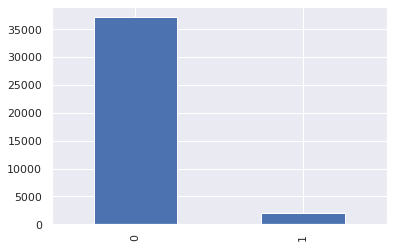

In [15]:
df_train.buy.value_counts().plot.bar()

**Observations**
- highly imbalanced, need to use SMOTe

**EDA**

In [16]:
!pip install sweetviz # importing sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
#analyzing the dataset
df_train_data_report = sv.analyze(df_train)
#display the report
df_train_data_report.show_html('df_train_data_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_train_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations**
39161   ROWS
0     DUPLICATES
18    FEATURES
14   CATEGORICAL
2    NUMERICAL
2     TEXT

Product buy 
2- 49%
3- 28%
1- 20%
4- 4%

- signup_date are whole 2021 year
- campaign_var_1 and 2 are having higher 4,8 and 4, 9
- campaign_var_1 top most  6, 5, 4
- Sparse matrix with lots of 0 than 1 values

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

Text(0.5, 1.0, 'scatterplot showing the variation of Products Purchased with buy')

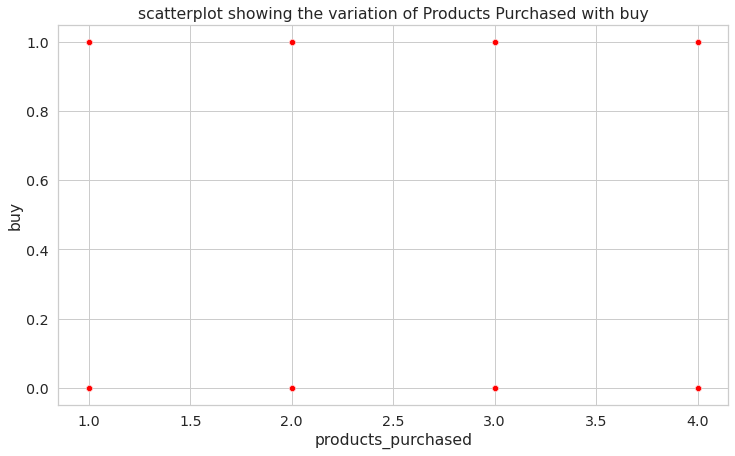

In [19]:
# Using seaborn's scatterplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df_train, x='products_purchased', y='buy', color='red')

plt.title('scatterplot showing the variation of Products Purchased with buy')

Text(0.5, 1.0, 'scatterplot showing the variation of Products Purchased with buy')

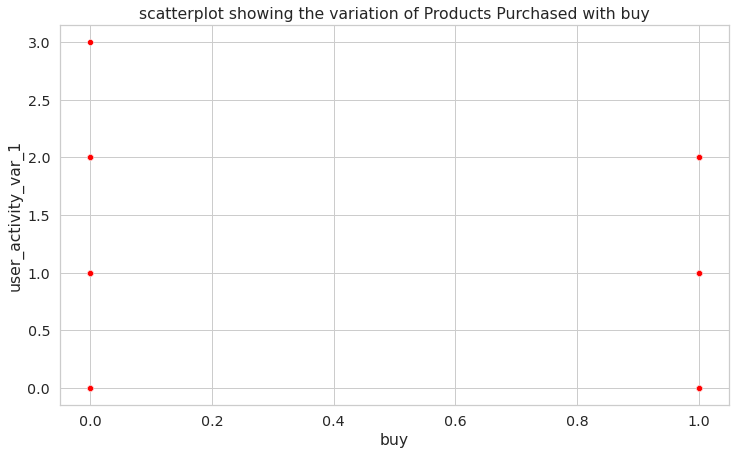

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_train, x='buy', y='user_activity_var_1', color='red')

plt.title('scatterplot showing the variation of Products Purchased with buy')

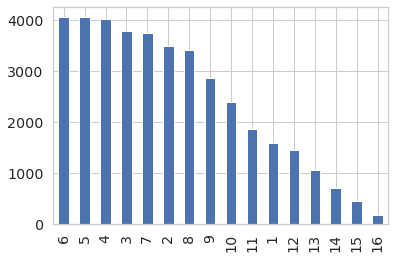

In [21]:
df_train.campaign_var_1.value_counts().plot.bar()


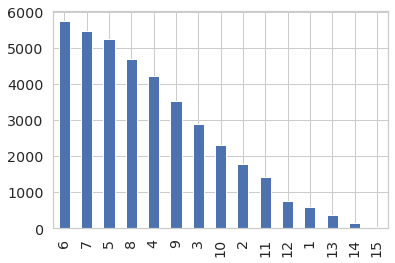

In [22]:
df_train.campaign_var_2.value_counts().plot.bar()

**Observations**
- 6,5,4 campaign var_1
- 6, 7, 5 campaign var_2
are the largest 

In [23]:
# changing index from object to datetime
df_train['created_at'] = pd.to_datetime(df_train['created_at']).dt.date.astype(str)

df_train = df_train.sort_values('created_at').reset_index(drop=False)
df_train.set_index('created_at', inplace=True)
#df_train.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
df_train.index = pd.to_datetime(df_train.index)
df_train.head()

,id,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
created_at,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2021-01-01,20,2,2,NaN,2020-10-22,1,0,0,0,1,1,0,1,0,0,0,0,0
2021-01-01,19,5,2,3.0,2017-10-12,0,0,0,0,0,0,1,1,0,0,0,0,0
2021-01-01,18,5,6,NaN,2021-10-20,0,0,0,0,0,1,0,1,0,0,0,0,0
2021-01-01,17,5,10,2.0,2020-10-31,1,0,0,0,1,1,0,0,0,0,0,0,0


In [24]:
# changing index from object to datetime
df_test['created_at'] = pd.to_datetime(df_test['created_at']).dt.date.astype(str)

df_test = df_test.sort_values('created_at').reset_index(drop=False)
df_test.set_index('created_at', inplace=True)
#df_train.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
df_test.index = pd.to_datetime(df_test.index)
df_test.head()

,id,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
created_at,,,,,,,,,,,,,,,,,
2022-01-01,39162,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
2022-01-01,39263,7,5,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,0
2022-01-01,39264,2,6,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0
2022-01-01,39265,4,5,NaN,2021-01-11,0,0,0,0,0,0,0,0,0,0,0,0
2022-01-01,39266,2,6,3.0,2020-06-26,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
pip install missingno


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import missingno as msno

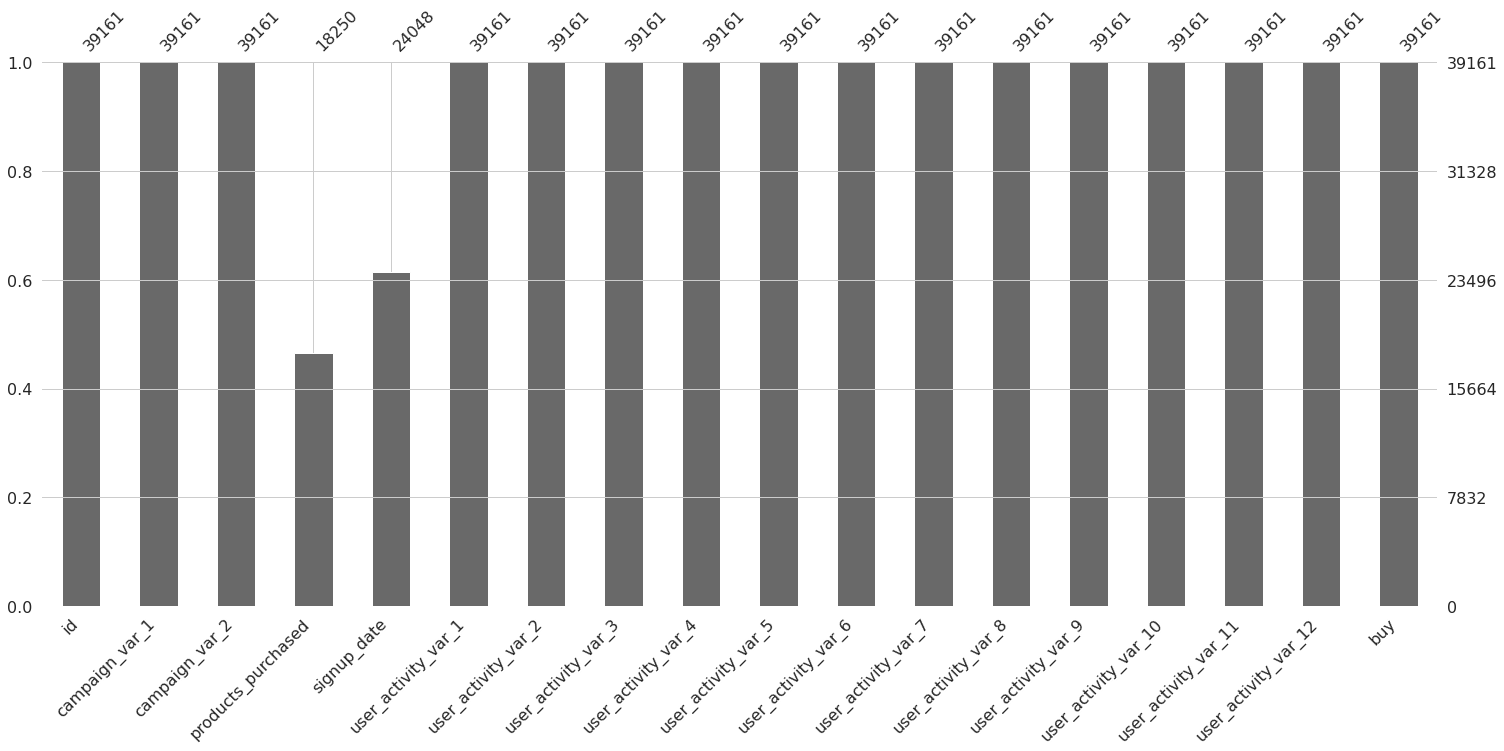

In [27]:
# Gives a bar chart of the missing values in train
msno.bar(df_train)

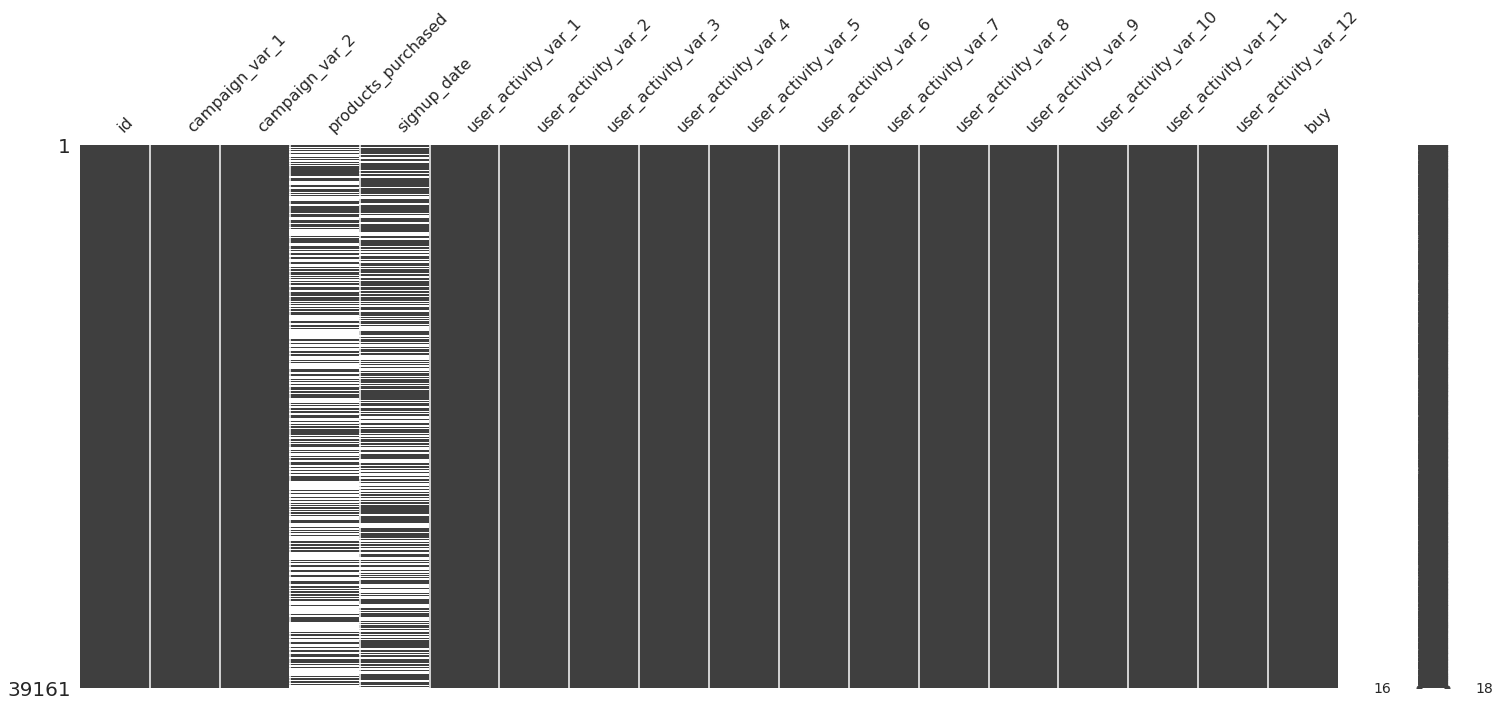

In [28]:
# Gives visualization information of the missing values
msno.matrix(df_train)

**Observations**
- plenty of continous missing values in products_purchased, doesnt look random missing
- strategy is to fill by median after groupby products_purchased

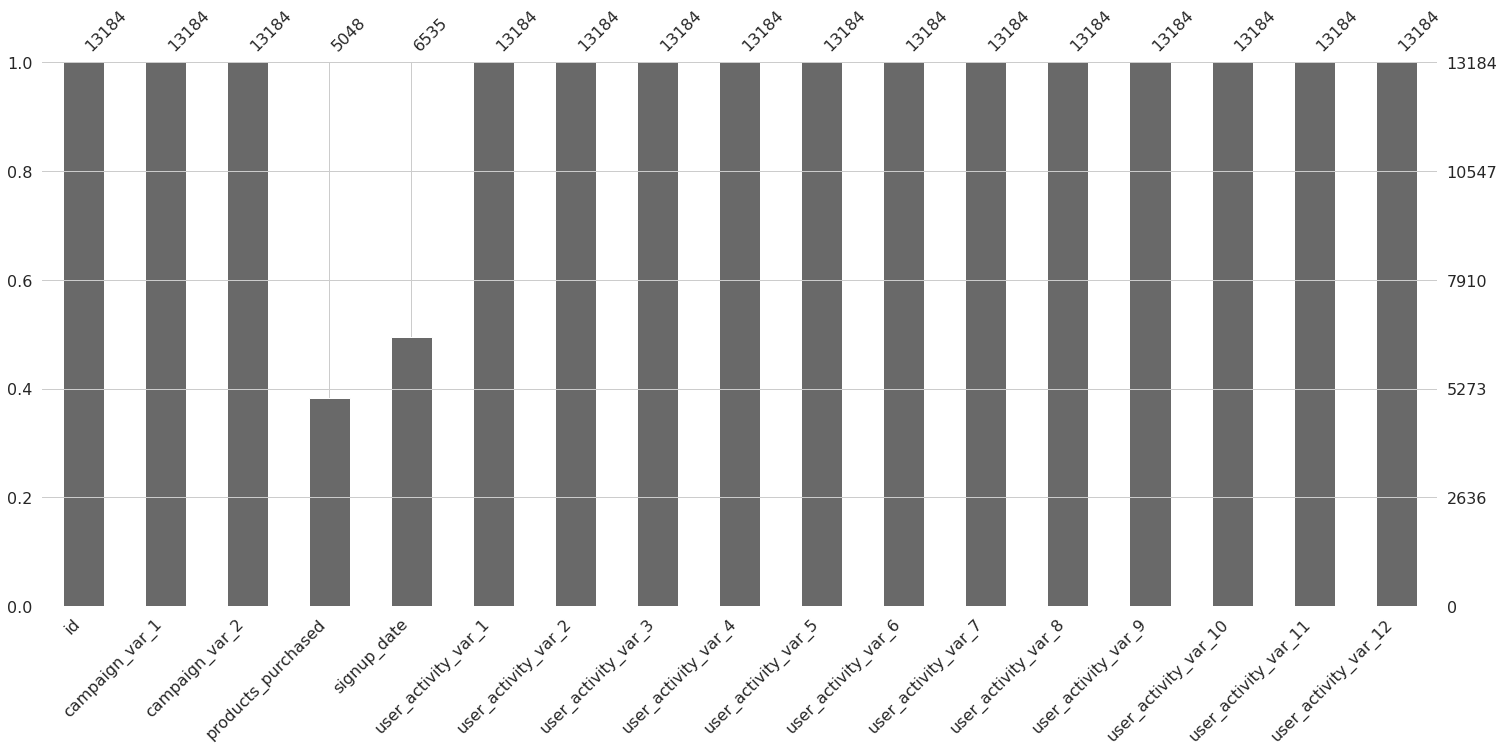

In [29]:
# Gives a bar chart of the missing values in train
msno.bar(df_test)

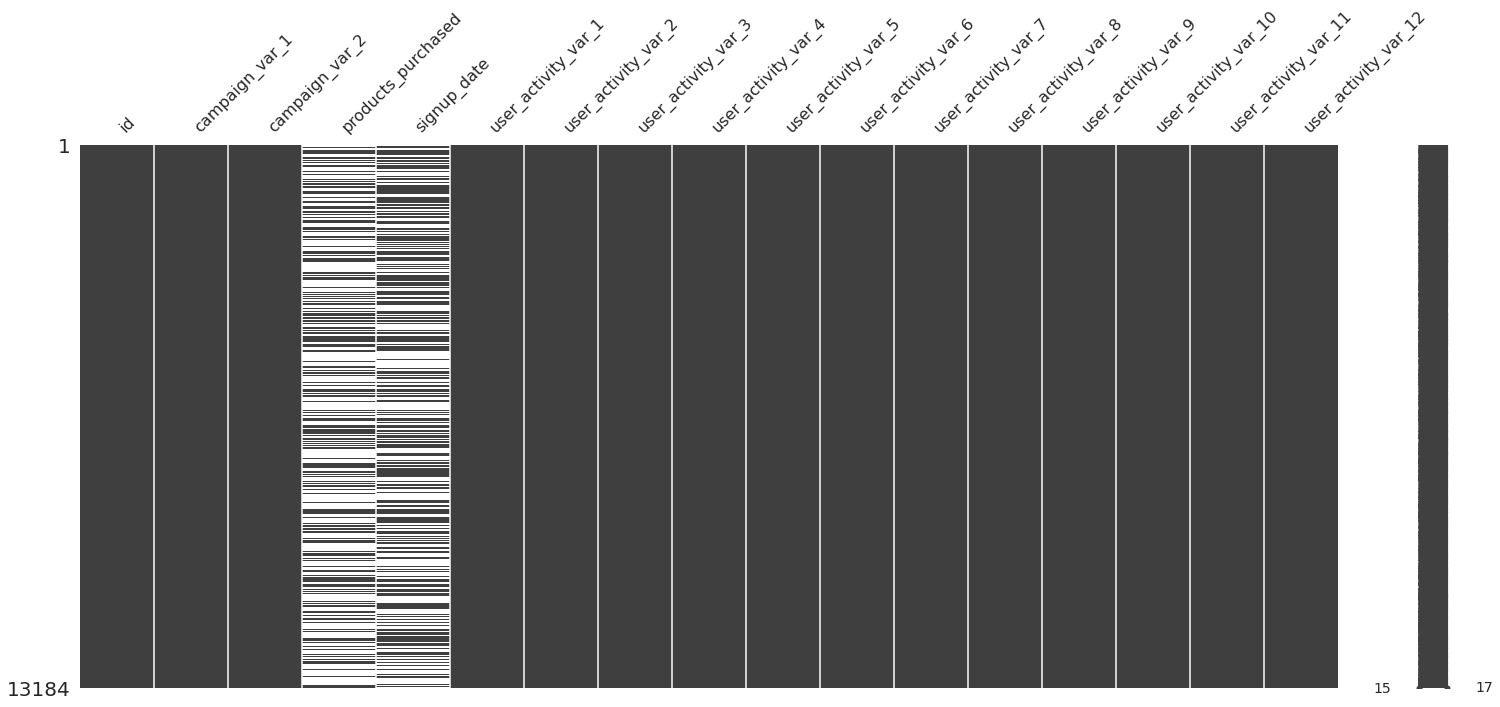

In [30]:
# Gives visualization information of the missing values
msno.matrix(df_test)

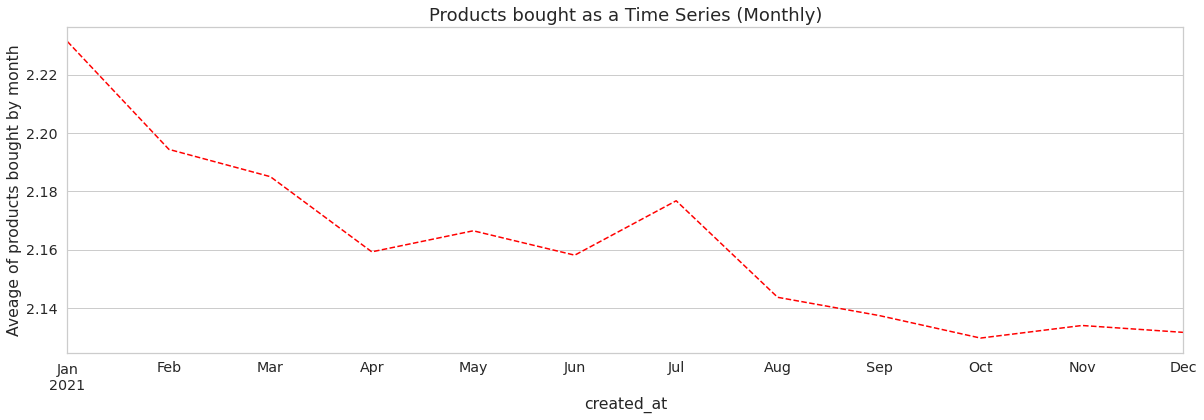

In [31]:
#Aveaged products purchased as Monthly
fig, ax = plt.subplots(figsize=(20, 6))
df_train.groupby(pd.Grouper(freq="M"))['products_purchased'].mean().plot(ax=ax, style=['--'], color='red')
ax.set_title('Products bought as a Time Series (Monthly)', fontsize=18)
ax.set_ylabel('Aveage of products bought by month')
plt.show()


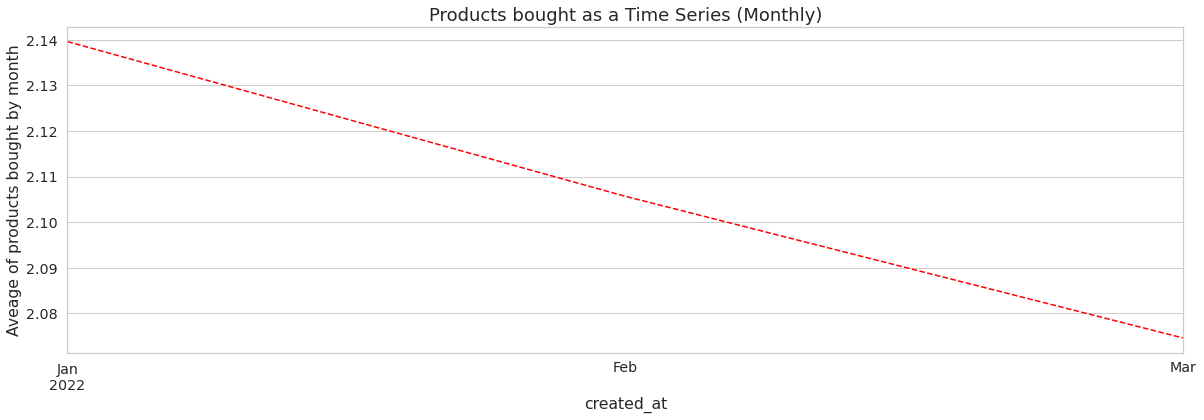

In [32]:
#Aveaged products purchased as Monthly
fig, ax = plt.subplots(figsize=(20, 6))
df_test.groupby(pd.Grouper(freq="M"))['products_purchased'].mean().plot(ax=ax, style=['--'], color='red')
ax.set_title('Products bought as a Time Series (Monthly)', fontsize=18)
ax.set_ylabel('Aveage of products bought by month')
plt.show()

In [33]:
#pd.crosstab(df_train['Day'], df_train['Month']).plot(kind='box')

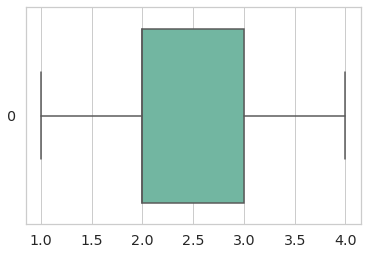

In [34]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_train['products_purchased'], orient="h", palette="Set2")
    return None 
lr()

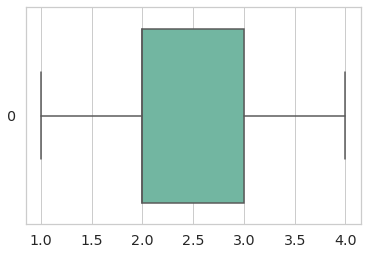

In [35]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_test['products_purchased'], orient="h", palette="Set2")
    return None 
lr()

**observations**
- both train and test data had very same statistical pattern of product_purchased
- now we can fill the column missing values by mean
- 4183 of them had about purchased 2.2 products

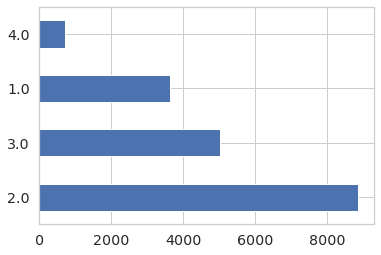

In [36]:
#we groupby people who purchased no.of products
df_train['products_purchased'].value_counts().plot(kind='barh')

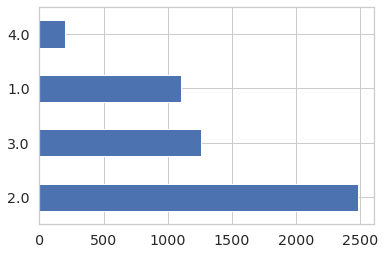

In [37]:
#we groupby people who purchased no.of products
df_test['products_purchased'].value_counts().plot(kind='barh')

**observations**
- Majorly they sold 2 and 3 products in the year 2021
- followed 1 and very less of 4 
- trend is similar also 2022 Jan-March in test data

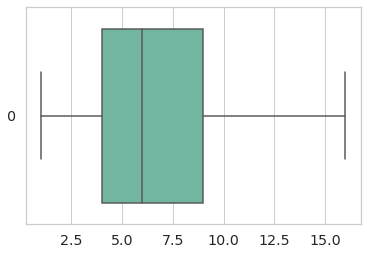

In [38]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_train['campaign_var_1'], orient="h", palette="Set2")
    return None 
lr()

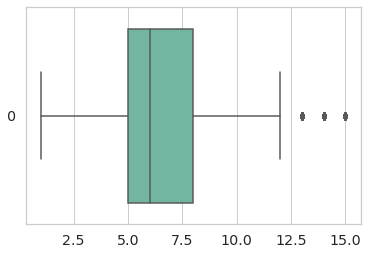

In [39]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_train['campaign_var_2'], orient="h", palette="Set2")
    return None 
lr()

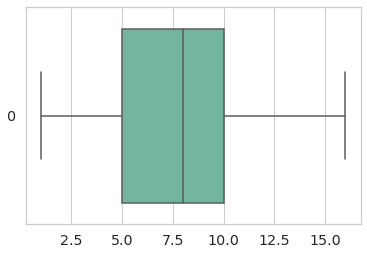

In [40]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_test['campaign_var_1'], orient="h", palette="Set2")
    return None 
lr()

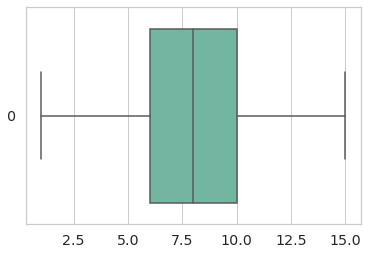

In [41]:
#box plot to check distribution
def lr():
    import seaborn as sns
    sns.boxplot(data=df_test['campaign_var_2'], orient="h", palette="Set2")
    return None 
lr()

**observations**
- distributions are different for campaign_var_1 train and test
- same is the case for campaign_var_2
- initially cimple model to see if these would make difference with a different model would be strategy


<Figure size 432x288 with 0 Axes>

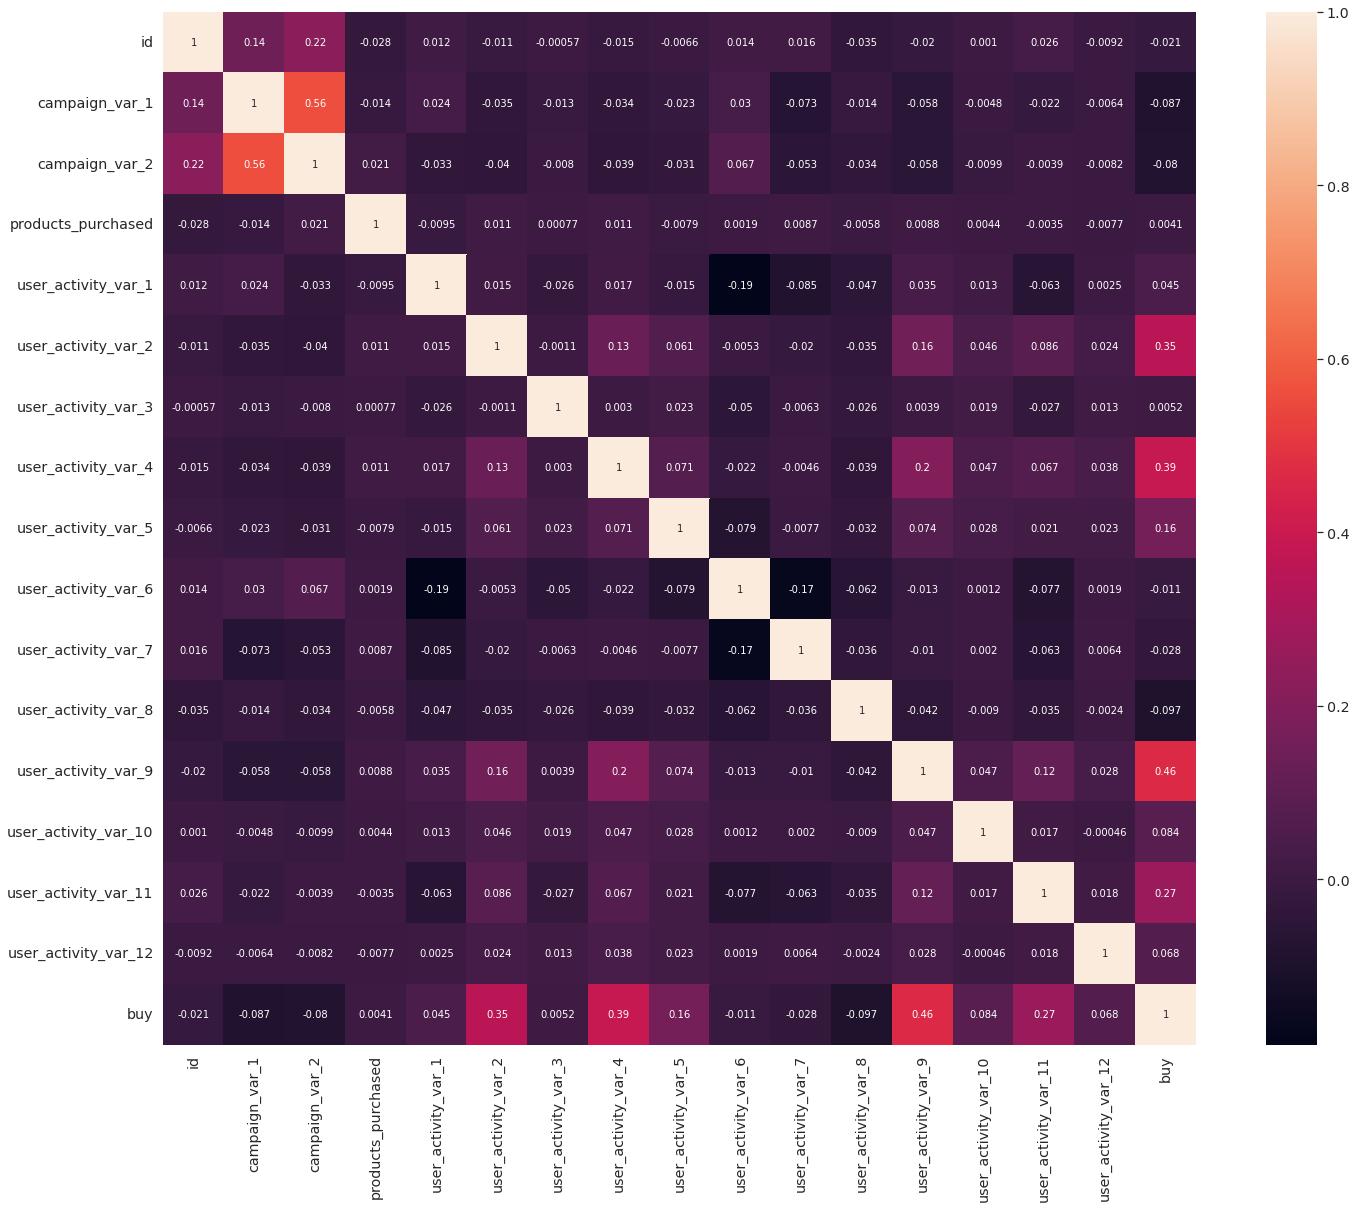

In [42]:
fig = plt.figure()

fig.suptitle('Feature Correlation', fontsize=18)
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(df_train.corr(), square=True, annot = True, annot_kws={'size':10})
#sns.heatmap(df_train.corr(), annot=True, cmap='RdBu', center=0)

In [43]:
#initially dropping of columns which are having 40-50% nulls and resetting index
df_train.drop(['id','products_purchased','signup_date'], axis=1, inplace=True)

In [44]:
df_train.columns

Index(['campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [45]:
features=['campaign_var_1', 'campaign_var_2','user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']

In [46]:
X=df_train[features]
y=df_train['buy']

In [47]:
# For Feature Importances

from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

Feature: 0, Score: 0.09456
Feature: 1, Score: 0.08904
Feature: 2, Score: 0.02174
Feature: 3, Score: 0.12730
Feature: 4, Score: 0.00905
Feature: 5, Score: 0.17036
Feature: 6, Score: 0.03182
Feature: 7, Score: 0.02261
Feature: 8, Score: 0.01114
Feature: 9, Score: 0.01056
Feature: 10, Score: 0.24222
Feature: 11, Score: 0.00582
Feature: 12, Score: 0.15950
Feature: 13, Score: 0.00430


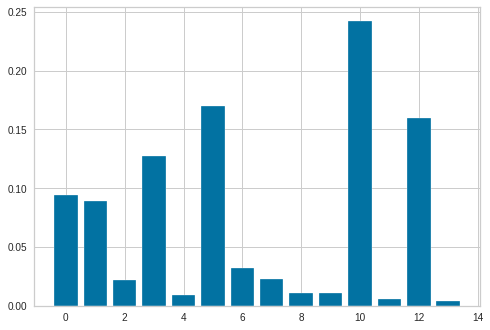

In [48]:
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.02193
Feature: 1, Score: 0.02628
Feature: 2, Score: 0.02653
Feature: 3, Score: 0.16435
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.15671
Feature: 6, Score: 0.06274
Feature: 7, Score: 0.01599
Feature: 8, Score: 0.01353
Feature: 9, Score: 0.04850
Feature: 10, Score: 0.29474
Feature: 11, Score: 0.02132
Feature: 12, Score: 0.12441
Feature: 13, Score: 0.02296


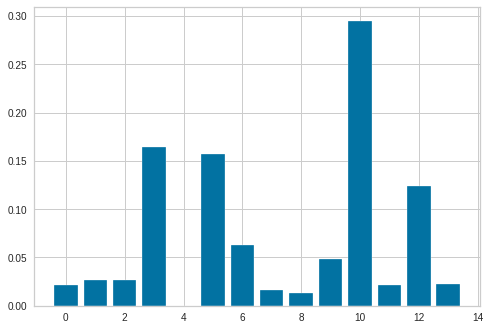

In [49]:
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [50]:
# Generate and plot a synthetic imbalanced classification
from six.moves import collections_abc
from collections import Counter
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=37163 (94.898%)
Class=1, n=1998 (5.102%)


In [51]:
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [53]:
# Generate and plot a synthetic imbalanced classification
from six.moves import collections_abc
from collections import Counter
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=37163 (50.000%)
Class=1, n=37163 (50.000%)


In [54]:
#Final Selection of features
Features_select=['campaign_var_1', 'campaign_var_2', 'user_activity_var_2',
       'user_activity_var_4', 'user_activity_var_6','user_activity_var_9',
       'user_activity_var_11']


In [55]:
df_train_final = X[Features_select]

In [56]:
X_unseen=df_test[Features_select]

In [57]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe1 = Pipeline((
("sc",StandardScaler()),    
("knn",KNeighborsClassifier(n_neighbors=7)) ,    
))
pipe1.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe1.score(X_test,y_test))
print("Training Accuracy")
print(pipe1.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe1, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.845150006726759
Training Accuracy
0.8543222334342415

Average Accuracy
0.8423477968382105


In [58]:
# Grid Search for Algorithm Tuning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import numpy as np
from sklearn.model_selection import GridSearchCV
a = np.arange(1,5)
model = KNeighborsClassifier()
grid = GridSearchCV(cv=10,estimator=model, scoring='accuracy',param_grid=dict(n_neighbors=a))
grid.fit(X_train, y_train)
# Make predictions using test data
y_pred_train = grid.predict(X_train)
# Make predictions using test data
y_pred = grid.predict(X_test)

# Calculate the train accuracy of the model
clf_train_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate the test accuracy of the model
clf_accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy of the model
 
print('[Train Accuracy]:', clf_train_accuracy)
print('[Test Accuracy]:', clf_accuracy )     
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print(grid.best_score_)

[Train Accuracy]: 0.8495122771611168
[Test Accuracy]: 0.8403067402125656
3
{'n_neighbors': 3}
0.8288261015808948


In [59]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe2 = Pipeline((
("lr", DecisionTreeClassifier(max_depth=13)),    
))
#changed max_depth to 10,15 for improving the accuracy
pipe2.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe2.score(X_test,y_test))
print("Training Accuracy")
print(pipe2.score(X_train,y_train))

Testing Accuracy
0.8631104533835599
Training Accuracy
0.8751765893037337


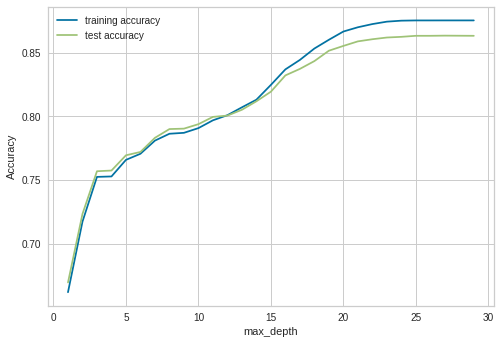

In [60]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [61]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)

rc = RandomForestClassifier()
rc.fit(Xtrain,ytrain)
print("Training Accuracy")
print(rc.score(Xtrain,ytrain))
print("Testing Accuracy")
print(rc.score(Xtest,ytest))
predicted = rc.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(rc,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average Accuracy")
print(np.mean(scoresdt))

Training Accuracy
0.8759838546922301
Testing Accuracy
0.8615632988026369
[[6227 1252]
 [ 806 6581]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7479
           1       0.84      0.89      0.86      7387

    accuracy                           0.86     14866
   macro avg       0.86      0.86      0.86     14866
weighted avg       0.86      0.86      0.86     14866

[0.86848301 0.86276488 0.86764211 0.85822402 0.86646485 0.8609149
 0.85889674 0.85990582 0.85704675 0.85284225]
Average Accuracy
0.8613185334678775


In [62]:
X_test=df_test[features]
X_test.head(2)

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
created_at,,,,,,,,,,,,,,
2022-01-01,2,2,1,1,0,0,0,1,0,0,0,0,1,0
2022-01-01,7,5,1,0,0,0,1,0,0,0,0,0,0,0


In [63]:
rc.predict_proba(X_test)

array([[0.00277723, 0.99722277],
       [0.57494132, 0.42505868],
       [0.53676669, 0.46323331],
       ...,
       [0.54541635, 0.45458365],
       [0.8263778 , 0.1736222 ],
       [1.        , 0.        ]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
estimators=[('KNN', KNeighborsClassifier()),
            ("lr", DecisionTreeClassifier()),
            ('Random Forest',RandomForestClassifier())]

In [66]:
stack_clf=StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(),cv=10)
stack_clf.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('KNN', KNeighborsClassifier()),
                               ('lr', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [67]:
stack_clf.fit(Xtrain,ytrain)
print("Training Accuracy")
print(stack_clf.score(Xtrain,ytrain))
print("Testing Accuracy")
print(stack_clf.score(Xtest,ytest))
predicted = stack_clf.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(stack_clf,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average Accuracy")
print(np.mean(scoresdt))

Training Accuracy
0.8752102253615877
Testing Accuracy
0.8621687071169111
[[6338 1141]
 [ 908 6479]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7479
           1       0.85      0.88      0.86      7387

    accuracy                           0.86     14866
   macro avg       0.86      0.86      0.86     14866
weighted avg       0.86      0.86      0.86     14866

[0.86326942 0.86209216 0.86293306 0.85956946 0.86612849 0.86041036
 0.85805584 0.86242852 0.85704675 0.84998318]
Average Accuracy
0.860191725529768


In [68]:
y_pred_test=stack_clf.predict(X_test)
#y_pred_train=stack_clf.predict(X_train)

In [70]:
X_test['buy']=rc.predict(X_test)

In [71]:
X_test['id']=df_test['id']


In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13184 entries, 2022-01-01 to 2022-03-30
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        13184 non-null  int64
 1   campaign_var_2        13184 non-null  int64
 2   user_activity_var_1   13184 non-null  int64
 3   user_activity_var_2   13184 non-null  int64
 4   user_activity_var_3   13184 non-null  int64
 5   user_activity_var_4   13184 non-null  int64
 6   user_activity_var_5   13184 non-null  int64
 7   user_activity_var_6   13184 non-null  int64
 8   user_activity_var_7   13184 non-null  int64
 9   user_activity_var_8   13184 non-null  int64
 10  user_activity_var_9   13184 non-null  int64
 11  user_activity_var_10  13184 non-null  int64
 12  user_activity_var_11  13184 non-null  int64
 13  user_activity_var_12  13184 non-null  int64
 14  buy                   13184 non-null  int64
 15  id                    13184 non-null

In [73]:
buy_sub=X_test[['id','buy']].copy()

In [74]:
buy_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13184 entries, 2022-01-01 to 2022-03-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      13184 non-null  int64
 1   buy     13184 non-null  int64
dtypes: int64(2)
memory usage: 309.0 KB


In [75]:
buy_sub.head()

,id,buy
created_at,,
2022-01-01,39162,1
2022-01-01,39263,0
2022-01-01,39264,0
2022-01-01,39265,1
2022-01-01,39266,0


In [76]:
buy_sub.to_csv('submission_1.csv',index=False,header=True)